In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os

dataset=pd.read_excel("./PKIS2_dataset.xlsx", engine='openpyxl', nrows=645)

array = dataset[dataset.columns[7:]].to_numpy()

num_maxed_out = 0
fold_potency = []

for i in array:
    i.sort()
    f_p = i[(len(i)-1)]/i[(len(i)-2)]
    if (i[(len(i)-1)] == 100) and (i[(len(i)-2)] == 100):
        num_maxed_out +=1
    else:
        fold_potency.append(f_p)
print(num_maxed_out)
print(len(array))
print(len(fold_potency))

298
645
347


/usr/local/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


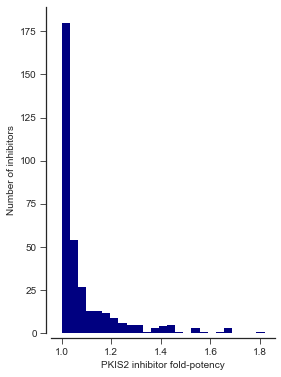

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(4, 6))
ax = fig.add_subplot(1,1,1)

fold_potency.sort()
x = [*range(0,len(fold_potency),1)]

#plt.scatter(x, fold_potency, c='k', marker='o', s=8)

plt.style.use('seaborn-ticks')

def adjust_spines(ax, spines, offset):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', offset))
            #spine.set_smart_bounds(True)
        else:
            spine.set_color('none') 
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        ax.xaxis.set_ticks([])

ax.hist(fold_potency, bins = 25, color = "navy")
adjust_spines(ax, ['left', 'bottom'], 5)

plt.xlabel('PKIS2 inhibitor fold-potency')

plt.ylabel('Number of inhibitors')

#plt.ylabel('Maximum Target Inhibition / Second-Most Target Inhibition')

#plt.text(50, 1.8, 'n=347')

#plt.title('Fold-potency of PKIS2 inhibitors')

fig.savefig("013122_PKIS2-fold-potency.pdf", bbox_inches='tight',dpi=1000)

plt.show()